<a href="https://colab.research.google.com/github/ydhu17/Machine-Learning/blob/main/car_evaluation_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/car_evaluation.csv",header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
col_name=['buying','maint','doors','persons','lug_boot','safety','class']
df.columns=col_name
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
df.shape

(1728, 7)

In [ ]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
  df[i]=le.fit_transform(df[i])
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [ ]:
df['class'].value_counts()

2    1210
0     384
1      69
3      65
Name: class, dtype: int64

In [ ]:
x=df.iloc[:,:-1].values
x

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [ ]:
y=df.iloc[:,-1].values
y

array([2, 2, 2, ..., 2, 1, 3])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train

array([[1, 0, 3, 1, 1, 1],
       [0, 1, 3, 1, 1, 0],
       [0, 3, 0, 1, 2, 0],
       ...,
       [2, 2, 0, 1, 0, 2],
       [3, 2, 0, 2, 2, 2],
       [2, 0, 3, 0, 0, 0]])

In [ ]:
y_train

array([2, 0, 2, ..., 0, 2, 2])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier=DecisionTreeClassifier(criterion='entropy')
DT_classifier.fit(x_train,y_train)
y_pred_entropy=DT_classifier.predict(x_test)
y_pred_entropy

array([2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 3, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 0, 0, 2, 0, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2,
       0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
print('Accuracy of test data',accuracy_score(y_test,y_pred_entropy))
y_train_pred=DT_classifier.predict(x_train)                            #to check over fitting 
print('Accuracy of train data',accuracy_score(y_train,y_train_pred))
# here the test data accuracy and train data accuracy  are almost same so its not over fitted

Accuracy of test data 0.9710982658959537
Accuracy of train data 1.0


Classification Report :               precision    recall  f1-score   support

           0       0.93      0.95      0.94       111
           1       0.90      0.86      0.88        22
           2       0.99      0.98      0.99       368
           3       1.00      1.00      1.00        18

    accuracy                           0.97       519
   macro avg       0.96      0.95      0.95       519
weighted avg       0.97      0.97      0.97       519



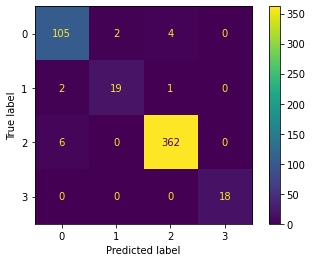

In [ ]:
print('Classification Report :',classification_report(y_test,y_pred_entropy))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_entropy))

In [ ]:
dt_gini_classifier=DecisionTreeClassifier()
dt_gini_classifier.fit(x_train,y_train)
y_pred_gini=dt_gini_classifier.predict(x_test)
y_pred_gini

array([2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 3, 0, 0, 0, 1, 2, 2, 3, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 0, 0, 2, 0, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2,
       0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       111
           1       0.90      0.86      0.88        22
           2       0.99      0.98      0.99       368
           3       0.94      0.94      0.94        18

    accuracy                           0.97       519
   macro avg       0.94      0.93      0.94       519
weighted avg       0.97      0.97      0.97       519



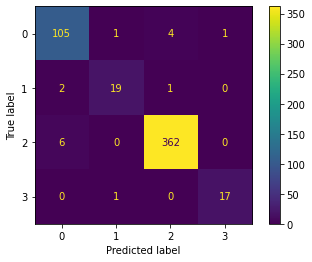

In [ ]:
print(classification_report(y_test,y_pred_gini))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_gini))